<a href="https://colab.research.google.com/github/CynthiaTheDataTechie/predicting-corporate-innovation/blob/main/Machine_Learning_using_Dummy_Dependent_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tabulate


In [ ]:
pip install stargazer #for importing stargarzer package

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import python packages
import pandas as pd
import numpy as np
import cv2
from numpy import nan as NA
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from stargazer.stargazer import Stargazer
%matplotlib inline
sns.set_theme(color_codes= True)
import math
import warnings
warnings.filterwarnings('ignore')
import math
from google.colab.patches import cv2_imshow
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
Path = ('/content/drive/MyDrive/Machinelearning/impact.xlsx')
image = cv2.imread('/content/drive/MyDrive/Machinelearning/var_hypothesis.jpg')

In [ ]:
df = pd.read_excel(Path)
pd.set_option('display.max_columns', None)
df

,id,Firm type,Country,state,innovativeness,type of company,Service Launch,r&d,investment,FinanceAcess,size,training,bonus system,promotion criteria,Revenue
0,154699,Service,Nigeria,Abuja,Yes,Limited partnership,Yes,No,Yes,Major obstacle,8.0,No,No,No promotion,350000.0
1,151266,Service,Nigeria,Anambra,No,Partnership,No,No,No,Major obstacle,50.0,No,Yes,No promotion,2000000.0
2,1518615,Service,Nigeria,Kano,Yes,Partnership,Yes,No,NaN,Major obstacle,NaN,No,No,No promotion,900000.0
3,151002336,Service,Nigeria,Anambra,Yes,Shareholding company with non-traded shares or...,Yes,No,Yes,Major obstacle,10.0,No,No,No promotion,7500000.0
4,1526408,Service,Nigeria,Kebbi,No,Shareholding company with shares trade in the ...,NaN,No,No,Major obstacle,8.0,No,No,No promotion,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1531980,Service,Nigeria,Lagos,Yes,Sole proprietorship,Yes,No,No,NaN,20.0,No,Yes,tenure,700000.0
956,1530365,Service,Nigeria,Ogun,Yes,OTHERS,No,Yes,NaN,NaN,42.0,Yes,Yes,performance,NaN
957,1529927,Service,Nigeria,Ogun,Yes,Shareholding company with shares trade in the ...,Yes,Yes,Yes,NaN,25.0,Yes,Yes,performance,NaN
958,1532033,Service,Nigeria,Ogun,Yes,Sole proprietorship,No,Yes,NaN,NaN,247.0,Yes,Yes,performance,NaN


## **Exploratory Data Analysis**

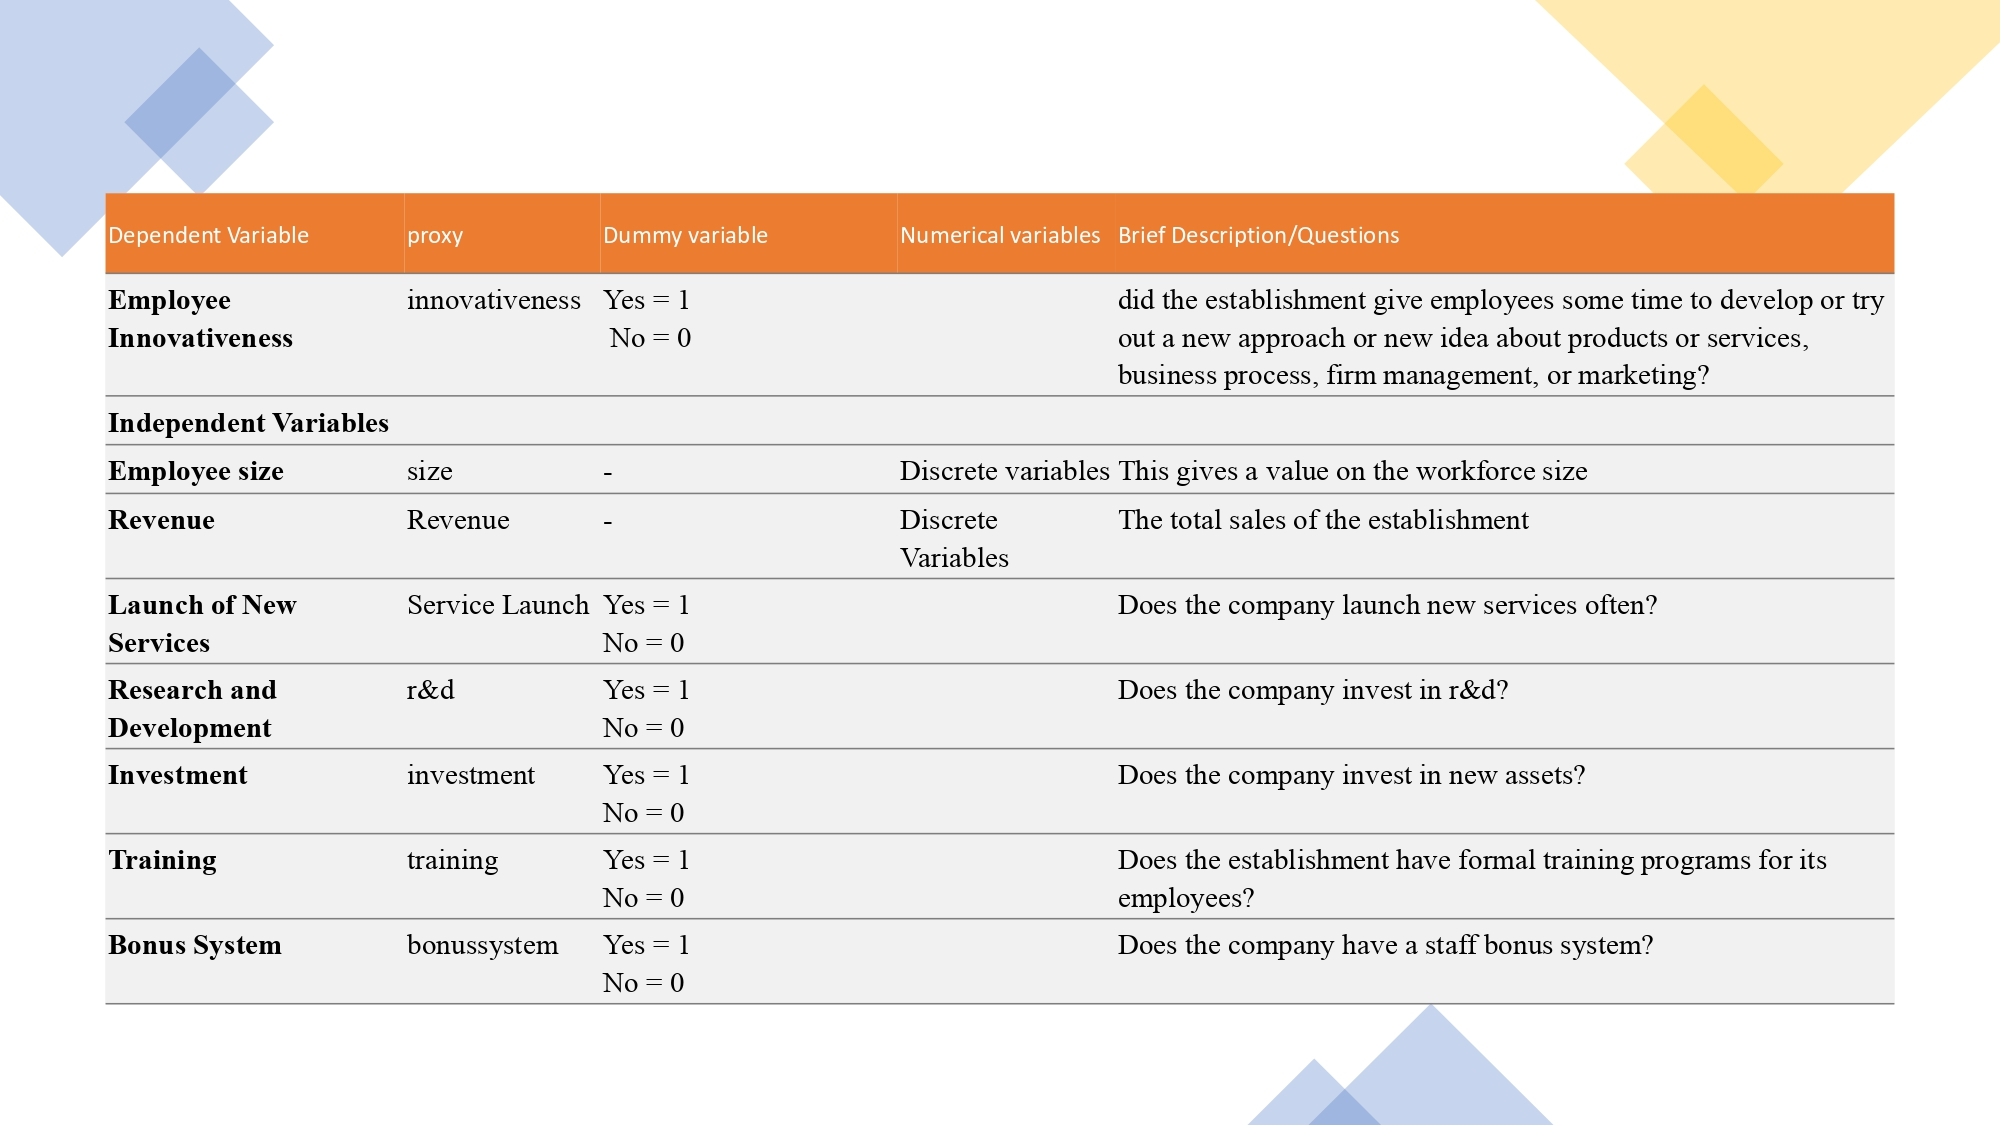

In [ ]:
 cv2_imshow(image)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  960 non-null    int64  
 1   Firm type           960 non-null    object 
 2   Country             960 non-null    object 
 3   state               960 non-null    object 
 4   innovativeness      941 non-null    object 
 5   type of company     960 non-null    object 
 6   Service Launch      945 non-null    object 
 7   r&d                 945 non-null    object 
 8   investment          894 non-null    object 
 9   FinanceAcess        945 non-null    object 
 10  size                921 non-null    float64
 11  training            960 non-null    object 
 12  bonus system        960 non-null    object 
 13  promotion criteria  960 non-null    object 
 14  Revenue             801 non-null    float64
dtypes: float64(2), int64(1), object(12)
memory usage: 112.6+ 

In [ ]:
#select the categorical data
df_cat =df[['innovativeness', 'type of company', 'Service Launch','r&d','investment','FinanceAcess','training', 'bonus system','promotion criteria','state']]
df_cat.head(5)

,innovativeness,type of company,Service Launch,r&d,investment,FinanceAcess,training,bonus system,promotion criteria,state
0,Yes,Limited partnership,Yes,No,Yes,Major obstacle,No,No,No promotion,Abuja
1,No,Partnership,No,No,No,Major obstacle,No,Yes,No promotion,Anambra
2,Yes,Partnership,Yes,No,NaN,Major obstacle,No,No,No promotion,Kano
3,Yes,Shareholding company with non-traded shares or...,Yes,No,Yes,Major obstacle,No,No,No promotion,Anambra
4,No,Shareholding company with shares trade in the ...,NaN,No,No,Major obstacle,No,No,No promotion,Kebbi


In [ ]:
#select numeric independent variables
df_numeric = df[['size','Revenue']]
df_numeric.head(2)


,size,Revenue
0,8.0,350000.0
1,50.0,2000000.0


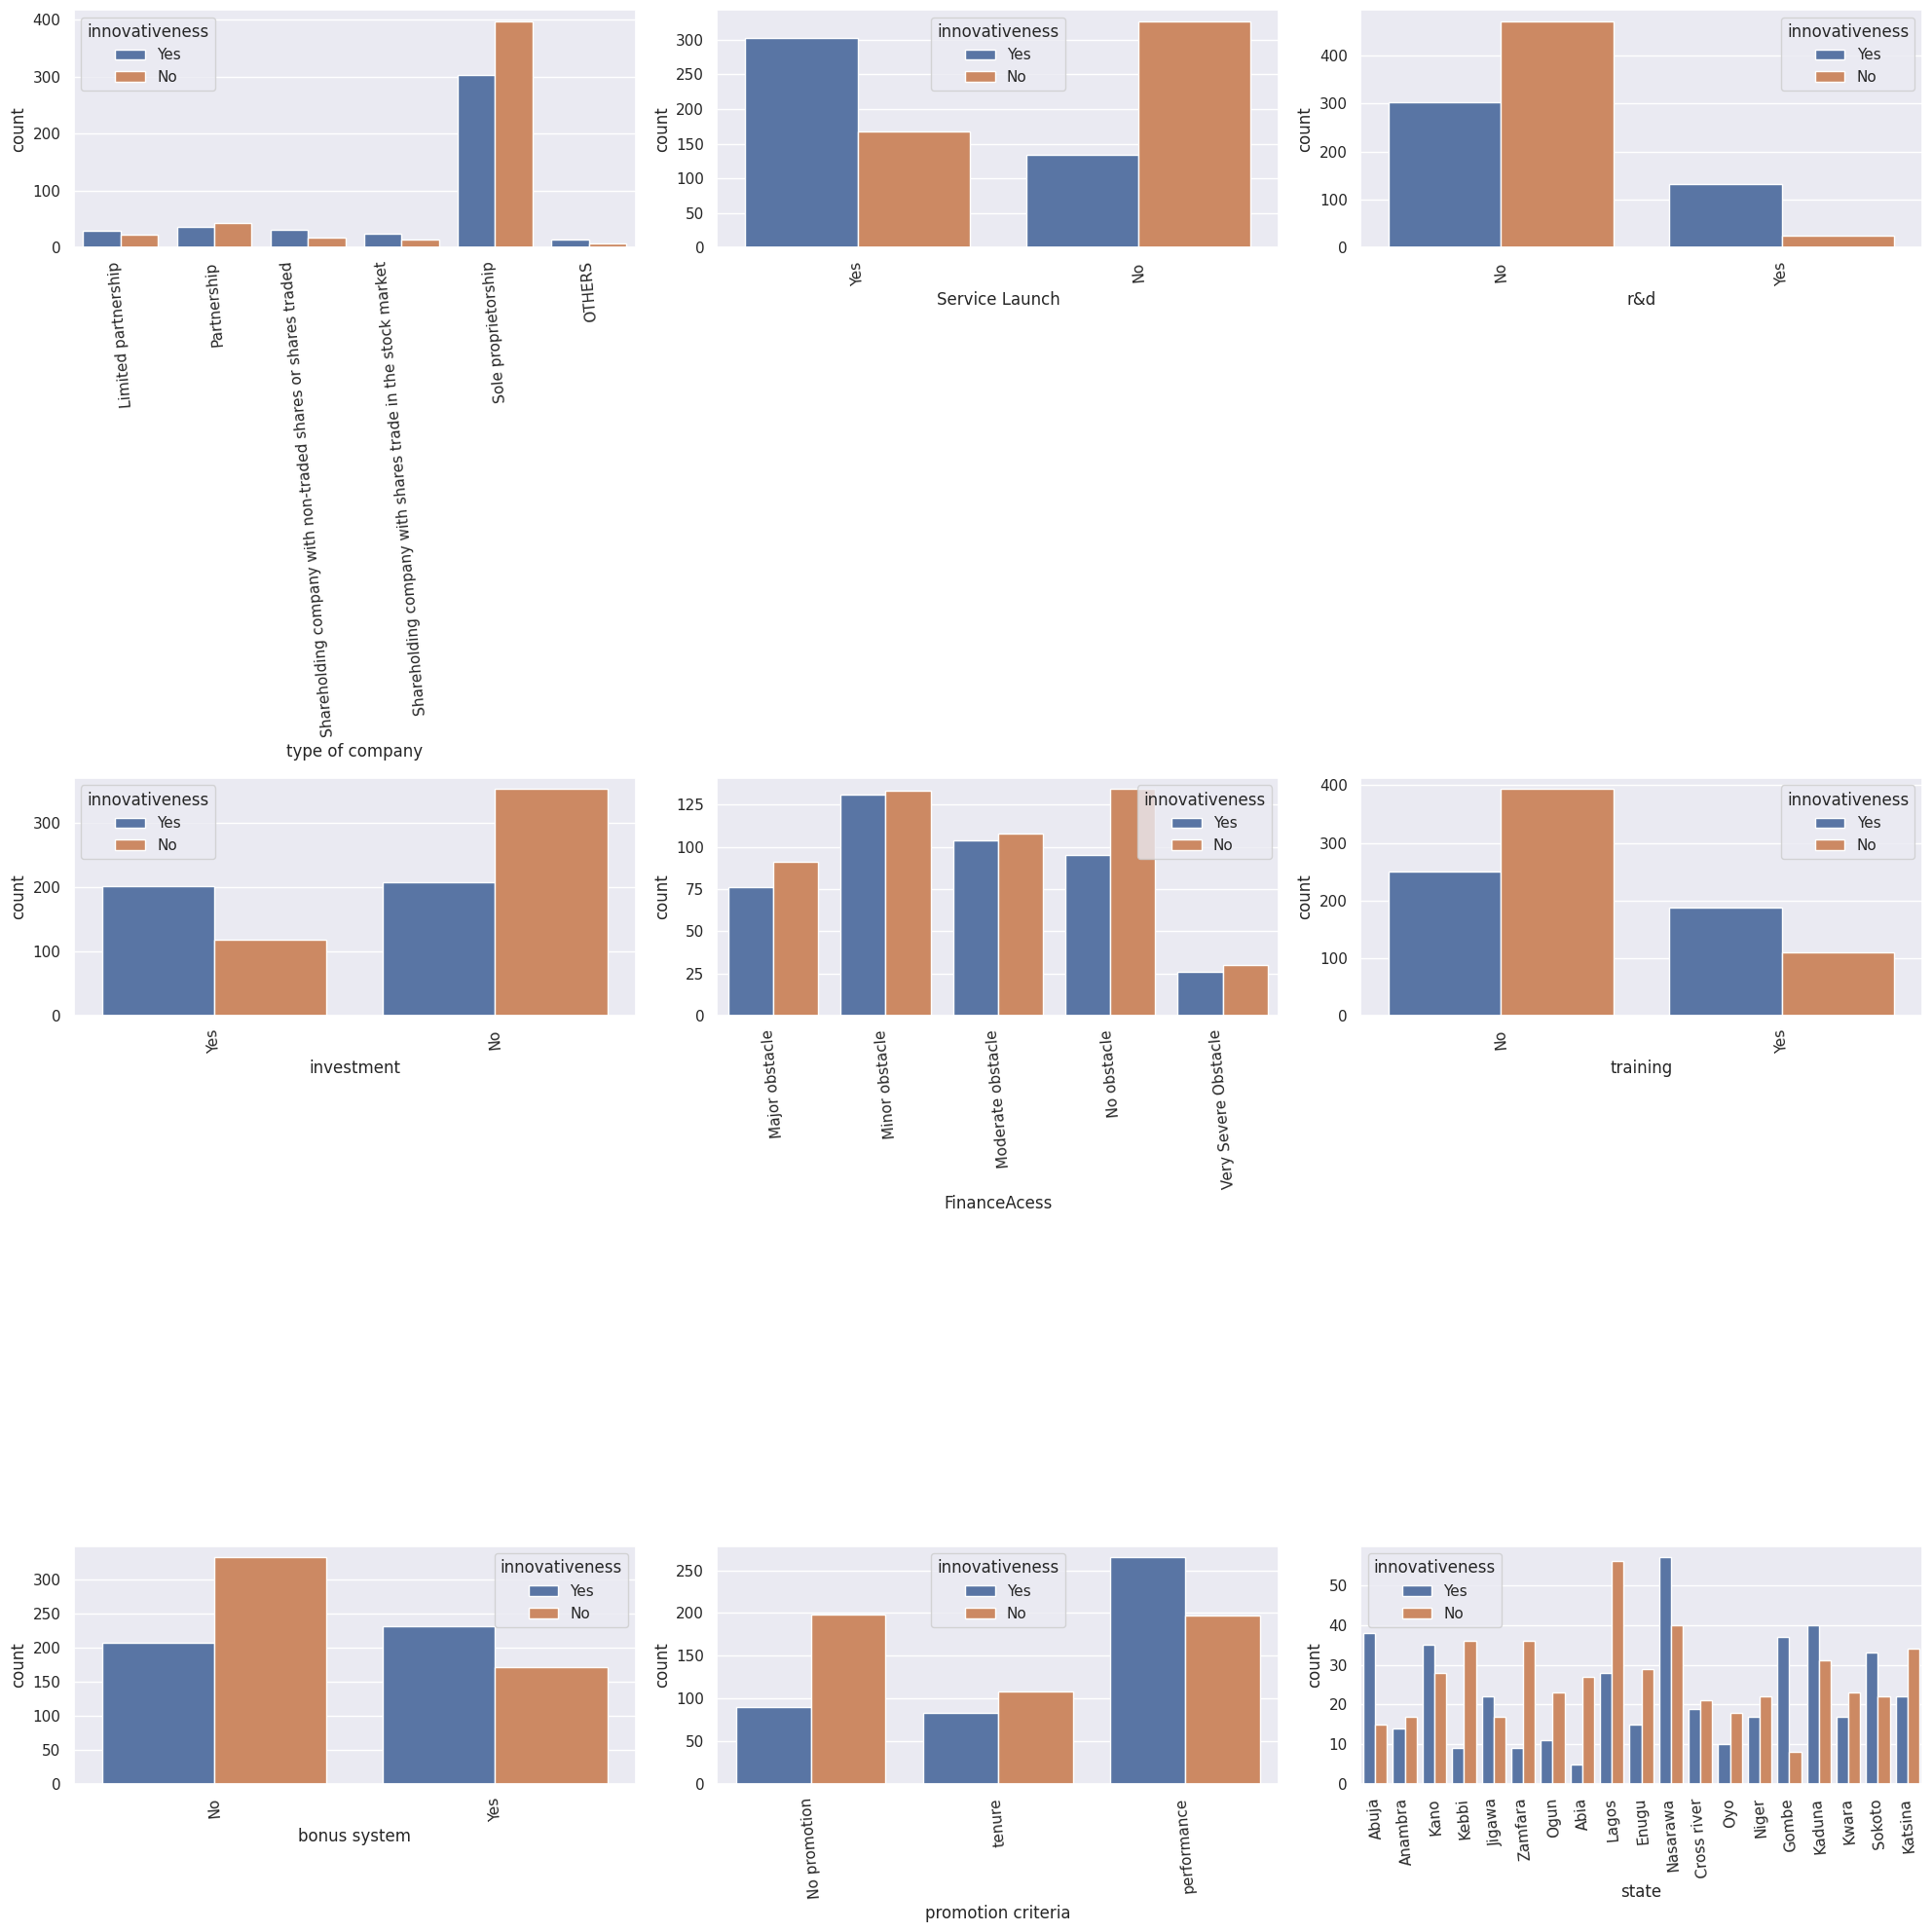

In [ ]:
cat_vars = ['type of company','Service Launch','r&d','investment','FinanceAcess','training','bonus system','promotion criteria','state']
num_vars = ['size','Revenue']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

# create countplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='innovativeness', data=df_cat, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation= 95)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

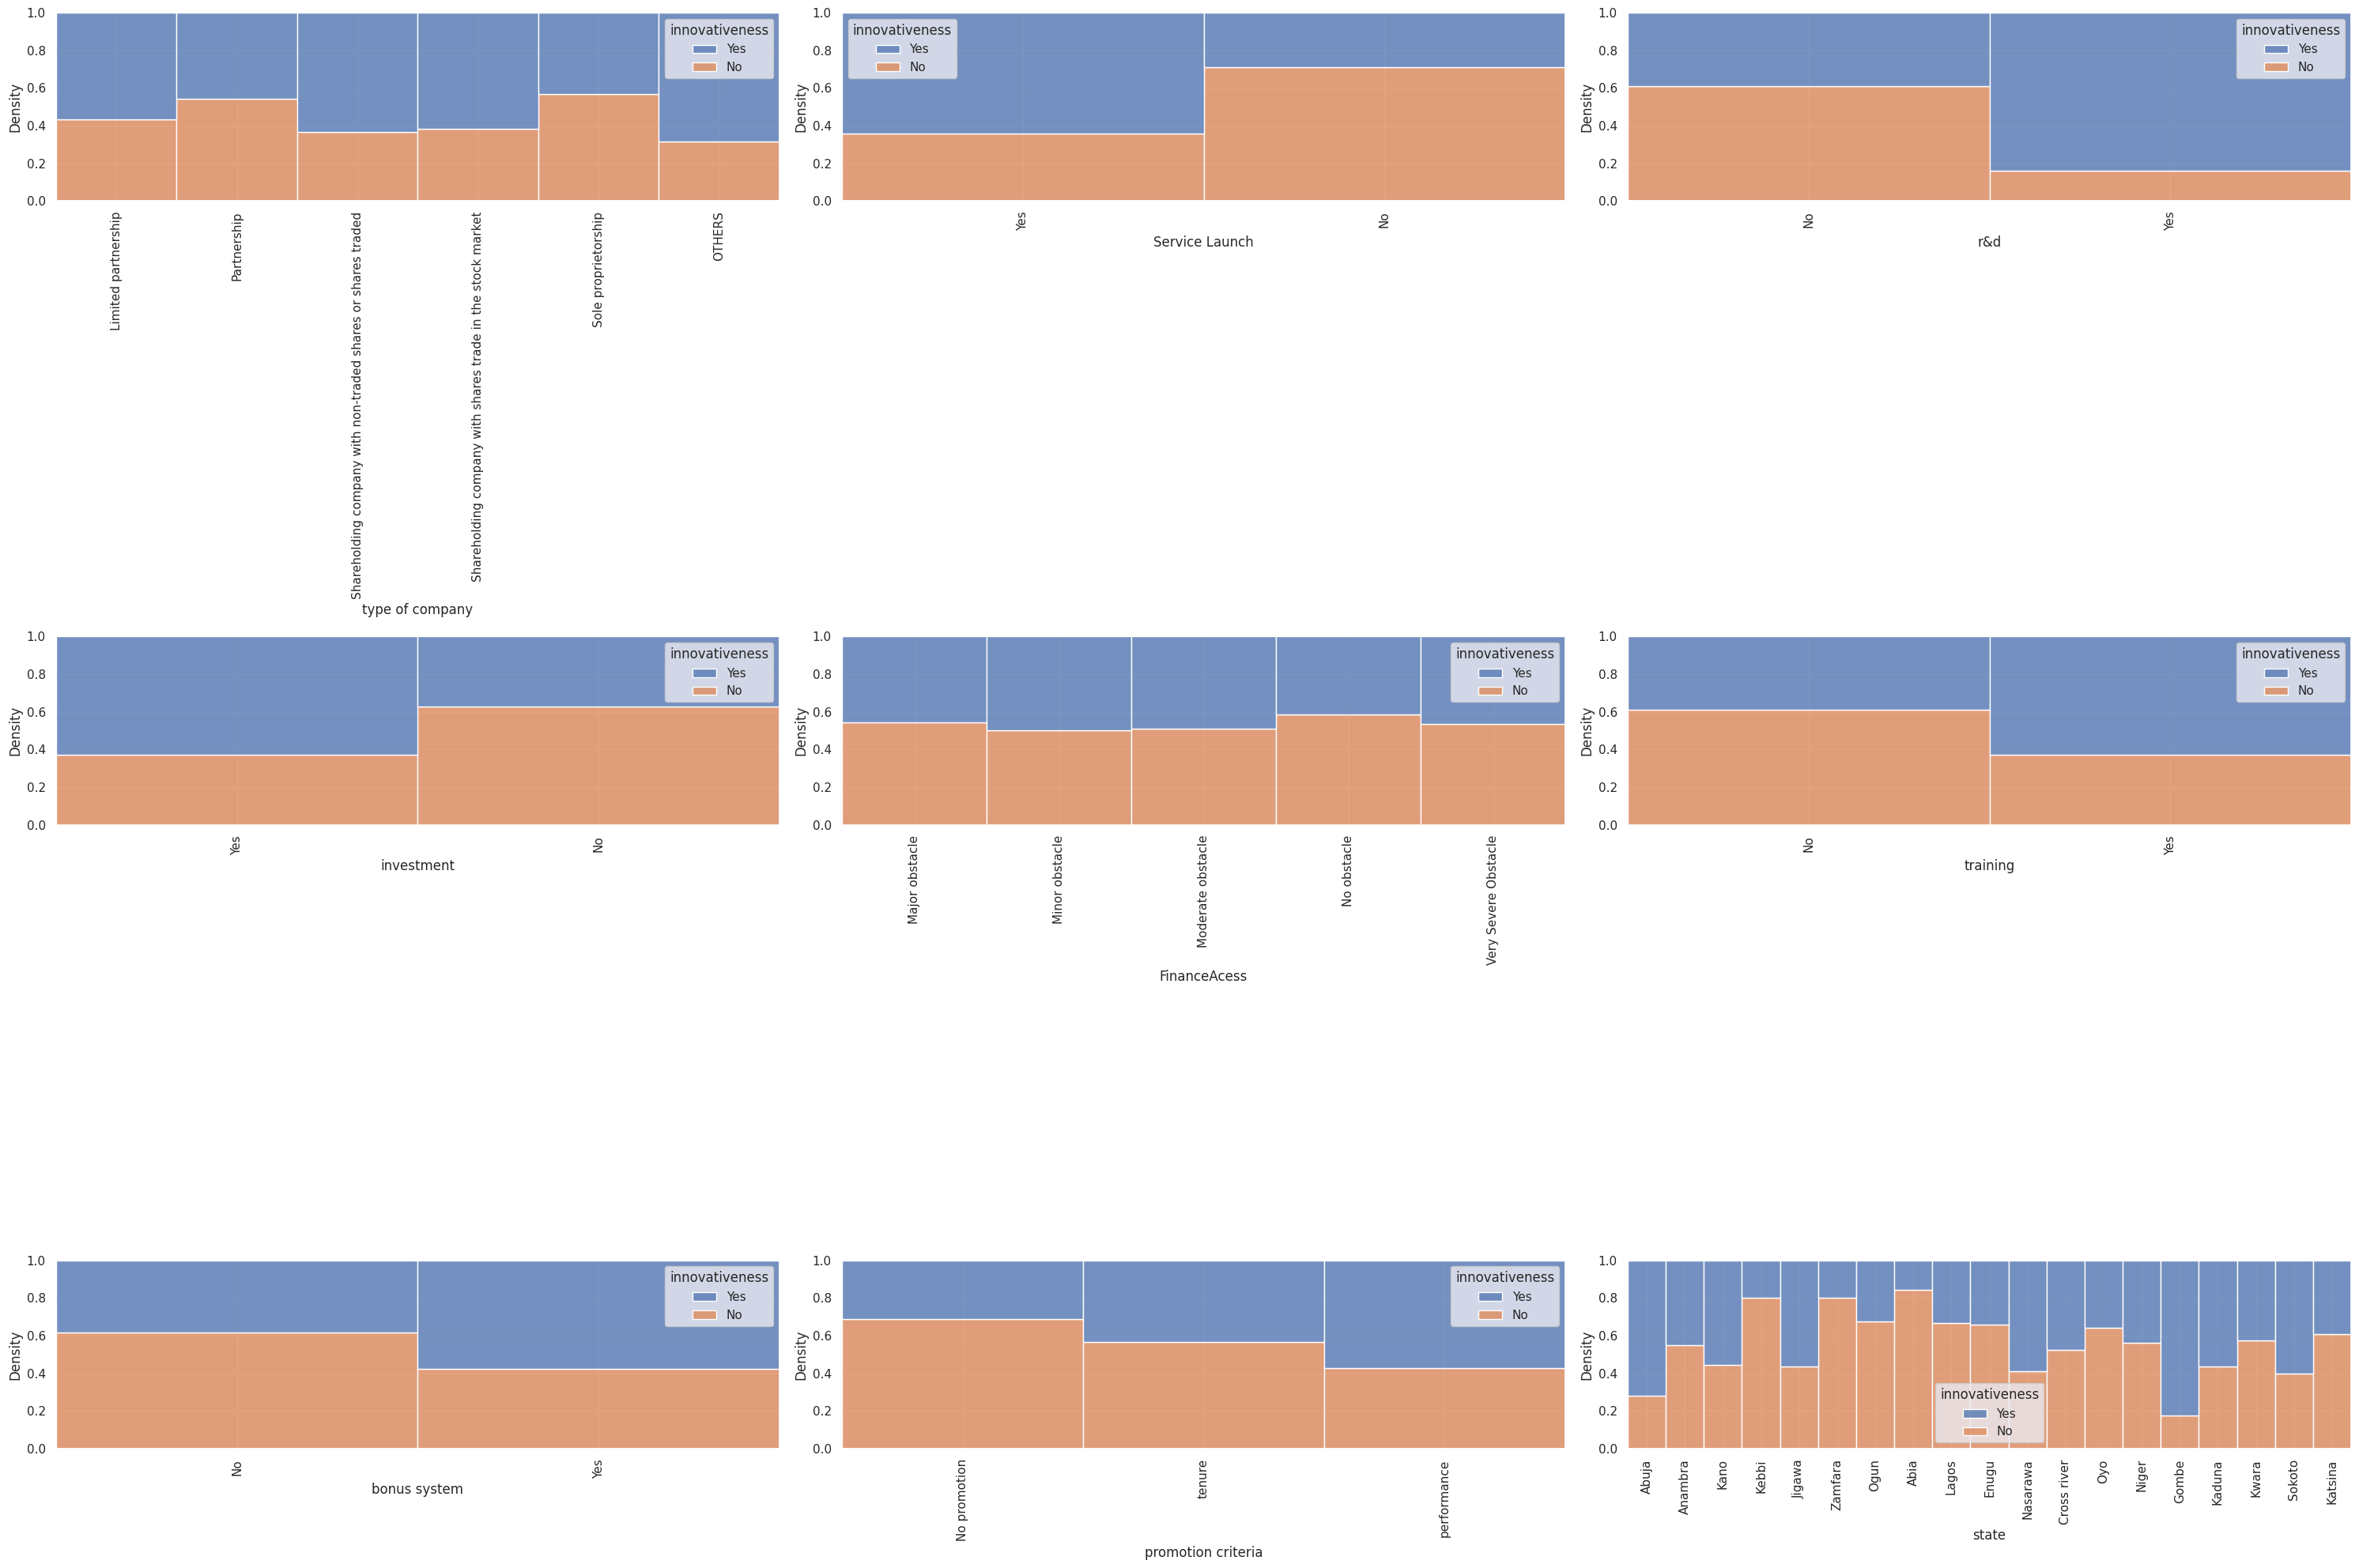

In [ ]:
# get list of categorical variables
cat_vars = ['type of company','Service Launch','r&d','investment','FinanceAcess','training','bonus system','promotion criteria','state']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30, 20))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue= 'innovativeness', data=df_cat, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df_cat[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

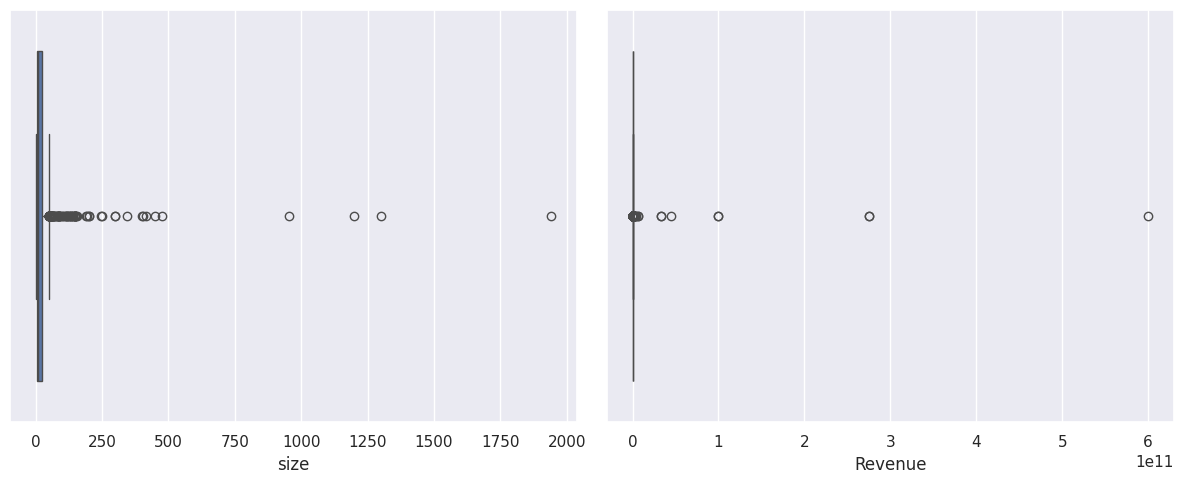

In [ ]:
num_vars = ['size', 'Revenue']
# Define the numerical variables for which boxplots are to be created

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
# Create a 1x2 grid of subplots with a specified figure size

axs = axs.flatten()
# Flatten the array of Axes objects for easier indexing

for i, var in enumerate(num_vars):# Loop through each numerical variable and create a boxplot
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
# Adjust the layout of the subplots to minimize overlap between them


plt.show()

In [ ]:
df.isnull() #check for columns/variables with null values

,id,Firm type,Country,state,innovativeness,type of company,Service Launch,r&d,investment,FinanceAcess,size,training,bonus system,promotion criteria,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
956,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
957,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
958,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True


In [ ]:
df.isnull().sum() #aggregate the sum of null values in each column

id                      0
Firm type               0
Country                 0
state                   0
innovativeness         19
type of company         0
Service Launch         15
r&d                    15
investment             66
FinanceAcess           15
size                   39
training                0
bonus system            0
promotion criteria      0
Revenue               159
dtype: int64

In [ ]:
df.drop(['id','Firm type','Country','state','type of company','promotion criteria','FinanceAcess'], axis=1,inplace = True) #dropping variables/columns not relevant to the analysis
df.head()

,innovativeness,Service Launch,r&d,investment,size,training,bonus system,Revenue
0,Yes,Yes,No,Yes,8.0,No,No,350000.0
1,No,No,No,No,50.0,No,Yes,2000000.0
2,Yes,Yes,No,NaN,NaN,No,No,900000.0
3,Yes,Yes,No,Yes,10.0,No,No,7500000.0
4,No,NaN,No,No,8.0,No,No,NaN


<Axes: >

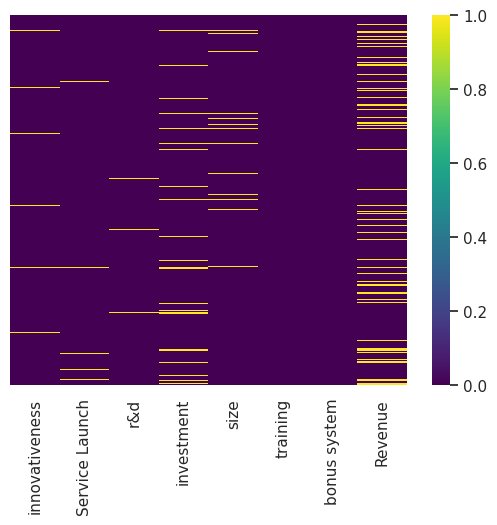

In [ ]:
sns.heatmap(df.isnull(),yticklabels= False, cmap ='viridis')
 #Heat map visualisation of the columns with null values. The yellow lines indicates the positions of the null values

## Data Wrangling

In [ ]:
df= df.dropna() #dropping null values in the dataframe
df

,innovativeness,Service Launch,r&d,investment,size,training,bonus system,Revenue
0,Yes,Yes,No,Yes,8.0,No,No,350000.0
1,No,No,No,No,50.0,No,Yes,2000000.0
3,Yes,Yes,No,Yes,10.0,No,No,7500000.0
5,Yes,No,Yes,No,12.0,No,No,1500000.0
8,No,No,No,No,1.0,No,No,900000.0
...,...,...,...,...,...,...,...,...
943,Yes,Yes,No,Yes,7.0,Yes,Yes,200000.0
944,Yes,Yes,Yes,No,11.0,Yes,No,2000000.0
951,No,No,No,Yes,2.0,No,No,200000.0
954,No,No,No,Yes,8.0,No,Yes,2000000.0


In [ ]:
df.describe() #summary statistics of the dataframe

,size,Revenue
count,713.000000,7.130000e+02
mean,30.391304,8.858189e+08
std,108.035366,1.181689e+10
min,1.000000,1.500000e+04
25%,6.000000,5.000000e+05
50%,10.000000,1.500000e+06
75%,22.000000,8.000000e+06
max,1942.000000,2.750000e+11


In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

innovativeness: ['Yes' 'No']
Service Launch: ['Yes' 'No']
r&d: ['No' 'Yes']
investment: ['Yes' 'No']
training: ['No' 'Yes']
bonus system: ['No' 'Yes']


In [ ]:


# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

innovativeness: [1 0]
Service Launch: [1 0]
r&d: [0 1]
investment: [1 0]
training: [0 1]
bonus system: [0 1]


In [ ]:
df.describe()

,innovativeness,Service Launch,r&d,investment,size,training,bonus system,Revenue
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,7.130000e+02
mean,0.496494,0.511921,0.162693,0.366059,30.391304,0.305750,0.431978,8.858189e+08
std,0.500339,0.500209,0.369344,0.482064,108.035366,0.461048,0.495699,1.181689e+10
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.500000e+04
25%,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000e+05
50%,0.000000,1.000000,0.000000,0.000000,10.000000,0.000000,0.000000,1.500000e+06
75%,1.000000,1.000000,0.000000,1.000000,22.000000,1.000000,1.000000,8.000000e+06
max,1.000000,1.000000,1.000000,1.000000,1942.000000,1.000000,1.000000,2.750000e+11


In [ ]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#import seaborn as sns
#sns.set_style('whitegrid')
#sns.set_context('talk')

#sns.set_theme(color_codes=True)
##sns.countplot(df['innovativeness'])
#f['innovativeness'].value_counts()


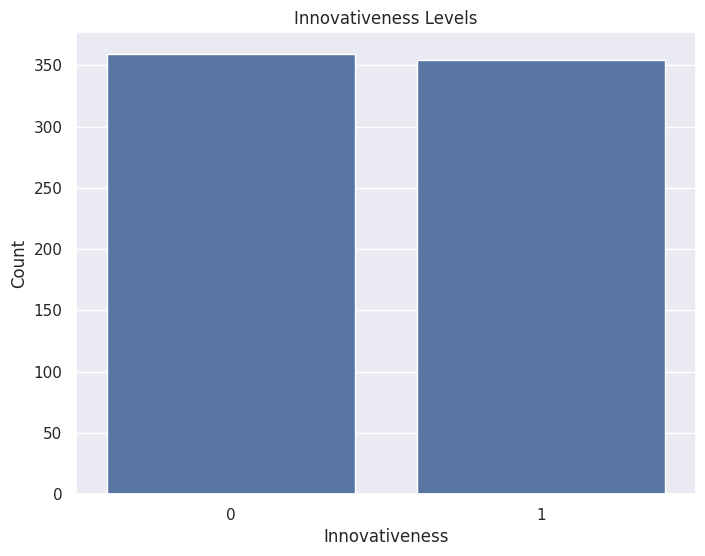

innovativeness
0    359
1    354
Name: count, dtype: int64

In [ ]:
# Create a count plot for the 'innovativeness' column
plt.figure(figsize=(8, 6))
sns.countplot(x=df['innovativeness'])
plt.title('Innovativeness Levels')
plt.xlabel('Innovativeness')
plt.ylabel('Count')
plt.show()
df['innovativeness'].value_counts()

In [ ]:
from sklearn.utils import resample #module is used to create new samples by randomly selecting existing samples with replacement
#create two different dataframe of innovativeness_yes and innovativeness_no
df_innovativeness_yes = df[(df['innovativeness']==1)]
df_innovativeness_no = df[(df['innovativeness']==0)]
# upsample innovativeness_yes class
df_innovateY_upsampled = resample(df_innovativeness_yes,
                                 replace=True,    # sample with replacement
                                 n_samples=len(df_innovativeness_no), # to match majority class
                                 random_state=0)  # reproducible results
# Combine innovativeness_no class with upsampled innovativeness_yes class
df_innovativenessNew = pd.concat([df_innovateY_upsampled, df_innovativeness_no])
print(f"After upsampling, the class distribution is: \n{df_innovativenessNew['innovativeness'].value_counts()}")

After upsampling, the class distribution is: 
innovativeness
1    359
0    359
Name: count, dtype: int64


In [ ]:
# define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# specify the columns to remove outliers from
columns_to_check = ['size']

# call the function to remove outliers using IQR
df_clean = remove_outliers_iqr(df_innovativenessNew, columns_to_check)

# print the resulting dataframe
df_clean.head()

,innovativeness,Service Launch,r&d,investment,size,training,bonus system,Revenue
472,1,1,0,0,6.0,0,0,130000.0
140,1,1,0,1,9.0,1,1,1600000.0
328,1,0,0,0,3.0,0,1,3000000.0
532,1,1,1,1,8.0,1,1,800000.0
864,1,1,1,0,25.0,1,1,1000000.0


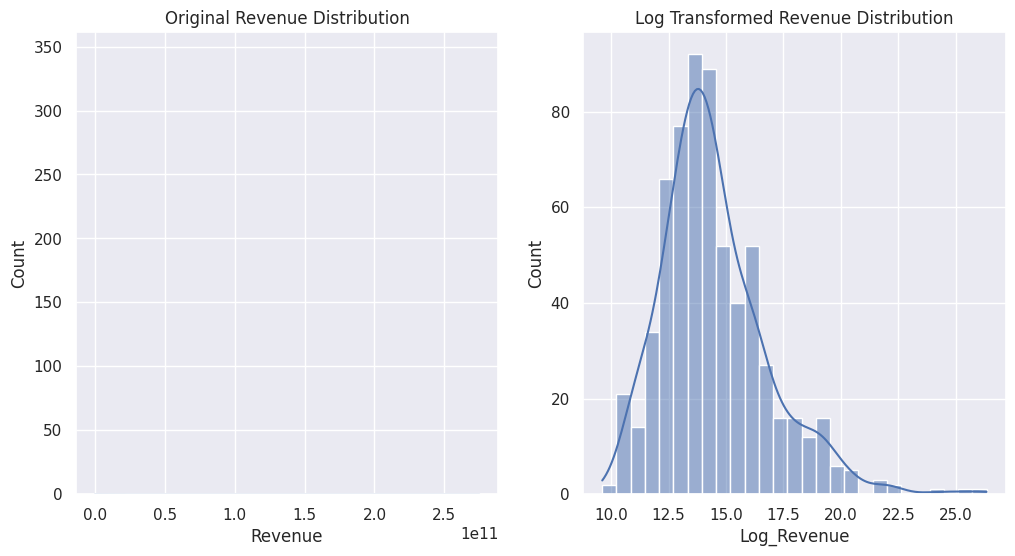

            Revenue  Log_Revenue
count  6.450000e+02   645.000000
mean   6.864227e+08    14.484058
std    1.159020e+10     2.324254
min    1.500000e+04     9.615872
25%    4.800000e+05    13.081543
50%    1.200000e+06    13.997833
75%    7.000000e+06    15.761421
max    2.750000e+11    26.340037


In [ ]:


# Apply log transformation to the Revenue variable
df_clean['Log_Revenue'] = np.log1p(df['Revenue'])  # log1p is used to handle zero values (log(1 + x))

# Check the transformed distribution
plt.figure(figsize=(12, 6))

# Original Revenue Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_clean['Revenue'], kde=True)
plt.title('Original Revenue Distribution')

# Log Transformed Revenue Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_clean['Log_Revenue'], kde=True)
plt.title('Log Transformed Revenue Distribution')

plt.show()
# Descriptive statistics after transformation
print(df_clean[['Revenue', 'Log_Revenue']].describe())



In [ ]:
# Descriptive statistics after transformation
print(df_clean[['Revenue', 'Log_Revenue']].describe())

            Revenue  Log_Revenue
count  6.450000e+02   645.000000
mean   6.864227e+08    14.484058
std    1.159020e+10     2.324254
min    1.500000e+04     9.615872
25%    4.800000e+05    13.081543
50%    1.200000e+06    13.997833
75%    7.000000e+06    15.761421
max    2.750000e+11    26.340037


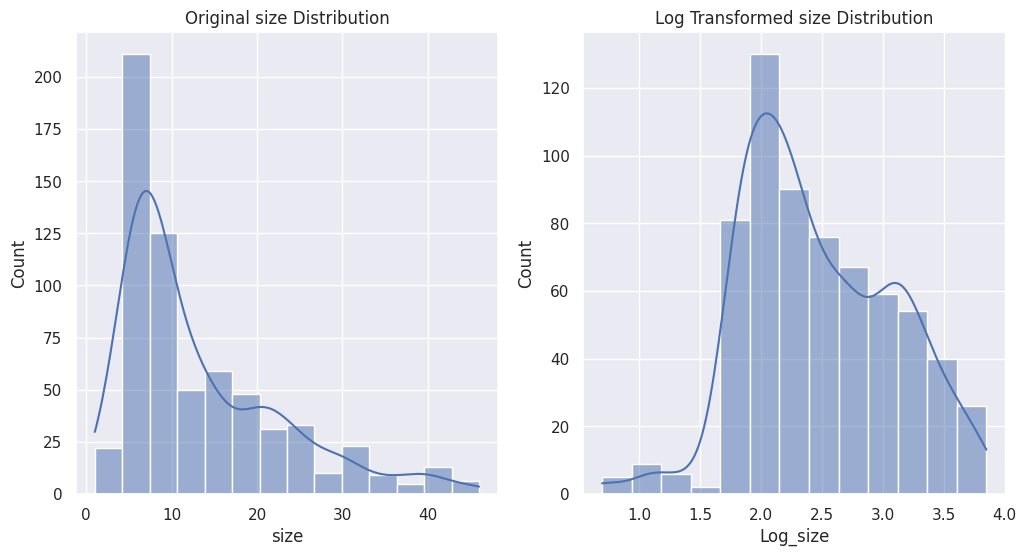

             size    Log_size
count  645.000000  645.000000
mean    13.327132    2.468535
std      9.477660    0.617611
min      1.000000    0.693147
25%      6.000000    1.945910
50%      9.000000    2.302585
75%     20.000000    3.044522
max     46.000000    3.850148


In [ ]:


# Apply log transformation to the size variable
df_clean['Log_size'] = np.log1p(df['size'])  # log1p is used to handle zero values (log(1 + x))

# Check the transformed distribution
plt.figure(figsize=(12, 6))

# Original size Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_clean['size'], kde=True)
plt.title('Original size Distribution')

# Log Transformed size Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_clean['Log_size'], kde=True)
plt.title('Log Transformed size Distribution')

plt.show()
# Descriptive statistics after transformation
print(df_clean[['size', 'Log_size']].describe())


In [ ]:
# Descriptive statistics after transformation
print(df_clean[['size', 'Log_size']].describe())

             size    Log_size
count  645.000000  645.000000
mean    13.327132    2.468535
std      9.477660    0.617611
min      1.000000    0.693147
25%      6.000000    1.945910
50%      9.000000    2.302585
75%     20.000000    3.044522
max     46.000000    3.850148


In [ ]:
df_clean.drop(['Revenue', 'size'], axis=1,inplace = True) #dropping variables/columns not relevant to the analysis
df_clean.head()


,innovativeness,Service Launch,r&d,investment,training,bonus system,Log_Revenue,Log_size
472,1,1,0,0,0,0,11.775297,1.945910
140,1,1,0,1,1,1,14.285515,2.302585
328,1,0,0,0,0,1,14.914123,1.386294
532,1,1,1,1,1,1,13.592368,2.197225
864,1,1,1,0,1,1,13.815512,3.258097


In [ ]:



# Ensure columns exist before renaming
if 'Log_size' in df_clean.columns and 'Log_Revenue' in df_clean.columns:
    df_clean.rename(columns={'Log_size': 'size', 'Log_Revenue': 'Revenue'}, inplace=True)

df_clean.head()


,innovativeness,Service Launch,r&d,investment,training,bonus system,Revenue,size
472,1,1,0,0,0,0,11.775297,1.945910
140,1,1,0,1,1,1,14.285515,2.302585
328,1,0,0,0,0,1,14.914123,1.386294
532,1,1,1,1,1,1,13.592368,2.197225
864,1,1,1,0,1,1,13.815512,3.258097


In [ ]:
# Correlation table
correlation_matrix = df_clean.corr()
styled_correlation_matrix = correlation_matrix.style.background_gradient(cmap='coolwarm', axis=None)

# Format the display of the correlation matrix to show 2 decimal places
display(styled_correlation_matrix.format(precision=2))

,innovativeness,Service Launch,r&d,investment,training,bonus system,Revenue,size
innovativeness,1.00,0.33,0.23,0.23,0.23,0.12,-0.05,0.15
Service Launch,0.33,1.00,0.19,0.26,0.26,0.21,0.06,0.11
r&d,0.23,0.19,1.00,0.18,0.21,0.14,0.06,0.06
investment,0.23,0.26,0.18,1.00,0.16,0.16,0.00,0.05
training,0.23,0.26,0.21,0.16,1.00,0.19,0.00,0.15
bonus system,0.12,0.21,0.14,0.16,0.19,1.00,0.18,0.14
Revenue,-0.05,0.06,0.06,0.00,0.00,0.18,1.00,0.20
size,0.15,0.11,0.06,0.05,0.15,0.14,0.20,1.00


## LOGISTIC REGRESSION USING SKLEARN


P(Y=1 | X) = 1 / (1 + e^(-(b0 + b1 * X1 + b2 * X2 + ... + bn * Xn)))

The Logistic function for this research is

P(Innovativeness=1 | X) = 1 / (1 + e^(-(b0 + β1 * Size + β2 * Service Launch + β3 * r&d + β4 * Investment + β5 * training +  β6* bonussystem )))

In [ ]:
X = df_clean.drop('innovativeness', axis = 1) #defining the independent variables
y = df_clean['innovativeness'] #defining the dependent variable

In [ ]:
#spliting test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:


lr = LogisticRegression(random_state=0)
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.linear_model import LogisticRegression # fitting my train dataset/variables using logistic regression
best_lr = grid_search.best_estimator_
best_lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [ ]:
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Retrieve the results of the grid search
cv_results = pd.DataFrame(grid_search.cv_results_)

# Print the results
print(cv_results[['mean_test_score', 'std_test_score', 'param_penalty', 'param_solver']])

# Check the best score achieved during the grid search
best_score = grid_search.best_score_
print(f"Best cross-validated score: {best_score}")


Best hyperparameters: {'penalty': 'l1', 'solver': 'liblinear'}
   mean_test_score  std_test_score param_penalty param_solver
0         0.660810        0.044565            l1    liblinear
1         0.658869        0.044761            l1         saga
2         0.658850        0.052615            l2    liblinear
3         0.654985        0.051544            l2         saga
Best cross-validated score: 0.6608103061986557


In [ ]:
##from sklearn.linear_model import LogisticRegression # fitting my train dataset/variables using logistic regression

##best_lr.fit(X_train, y_train)

In [ ]:
#Estimating the root mean square error and mean square error
#from sklearn.metrics import mean_squared_error
#y_pred = lr.predict(X_test)
#LR_score = round(accuracy_score(y_test, y_pred)*100 ,2)
#print("Logistic regression Accuracy Score :", LR_score, "%")
#LR_mse = mean_squared_error(y_test, y_pred)
#LR_rmse = np.sqrt(LR_mse)
#print('Logistic regression MSE: ',LR_mse)
#print('Logistic regression RMSE: ', LR_rmse)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score

# Predicting the labels for the test set
y_pred = best_lr.predict(X_test)
y_pred_prob = best_lr.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Calculating various performance metrics
LR_accuracy = accuracy_score(y_test, y_pred)
LR_precision = precision_score(y_test, y_pred)
LR_recall = recall_score(y_test, y_pred)
LR_f1 = f1_score(y_test, y_pred)
LR_log_loss = log_loss(y_test, y_pred_prob)
LR_auc = roc_auc_score(y_test, y_pred_prob)

# Printing the performance metrics
print("Logistic Regression Accuracy Score:", LR_accuracy)
print("Logistic Regression Precision:", LR_precision)
print("Logistic Regression Recall:", LR_recall)
print("Logistic Regression F1-Score:", LR_f1)
print("Logistic Regression Log-Loss:", LR_log_loss)
print("Logistic Regression AUC Score:", LR_auc)


Logistic Regression Accuracy Score: 0.5891472868217055
Logistic Regression Precision: 0.5694444444444444
Logistic Regression Recall: 0.6507936507936508
Logistic Regression F1-Score: 0.6074074074074073
Logistic Regression Log-Loss: 0.6381964179515687
Logistic Regression AUC Score: 0.6926406926406926


In [ ]:
#lr = LogisticRegression(random_state=0, solver='liblinear', penalty='l1')
#lr.fit(X_train, y_train)
#y_pred = lr.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score for Logistic Regression: 0.5891472868217055')

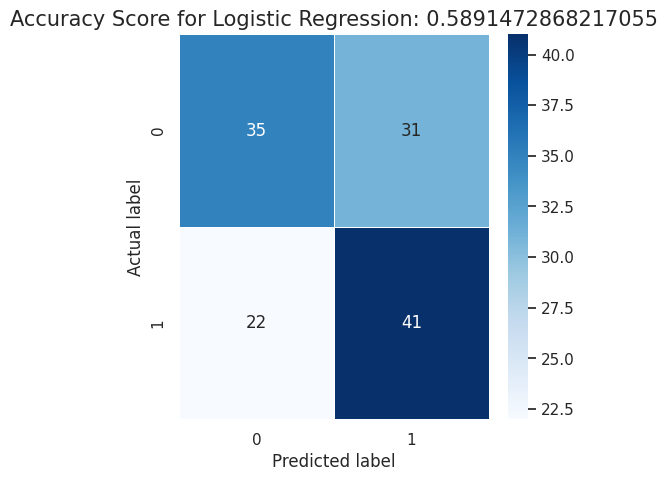

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(best_lr.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## Estimating the Odds Ratios and Marginal Effects for the logistic regression model

In [ ]:
import statsmodels.api as sm #Stasmodels package gives values of parameters (log-odds ratios, odds ratios, marginal effects).

import numpy as np
df_clean['constant'] = 1 # statsmodel package requires constant term in X matrix; skmodel package has built in constant
X = df_clean[['constant','Service Launch','r&d','investment','size','training','bonus system','Revenue']]
innovativeness = df_clean[['innovativeness']]  #independent variables
logit_model=sm.Logit(innovativeness,X)
result=logit_model.fit()
print("Log-odds ratio")
print(result.summary2())

print("Odds ratio")
print(round(np.exp(result.params), 3))  #odds-ratio

AME = result.get_margeff(at = "overall", method = "dydx")  #marginal effects
print("Marginal Effects")
print(AME.summary())

Optimization terminated successfully.
         Current function value: 0.592117
         Iterations 6
Log-odds ratio
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: innovativeness   Pseudo R-squared: 0.146     
Date:               2024-08-06 23:08 AIC:              779.8311  
No. Observations:   645              BIC:              815.5851  
Df Model:           7                Log-Likelihood:   -381.92   
Df Residuals:       637              LL-Null:          -447.04   
Converged:          1.0000           LLR p-value:      5.5655e-25
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
constant          -0.5390   0.6243 -0.8633 0.3880 -1.7627  0.6847
Service Launch     1.0591   0.1820  5.8197 0.0000  

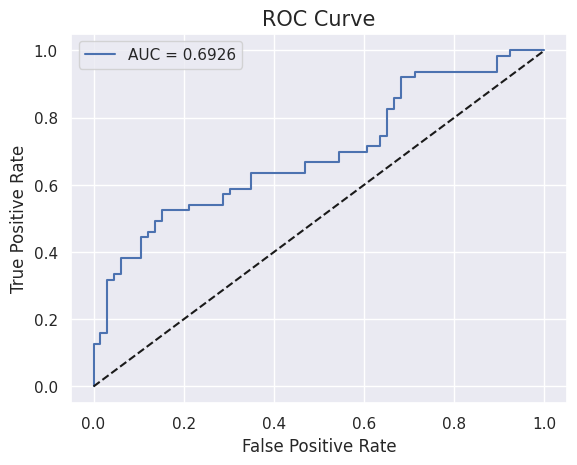

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = best_lr.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
LR_auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %LR_auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Random Forest ROC Curve', size = 15)
plt.legend()

##Random Forest Model

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score

# Assuming df_clean is your cleaned DataFrame
# X = independent variables, y = dependent variable
X = df_clean.drop('innovativeness', axis=1)
y = df_clean['innovativeness']

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #python module for hyperparameter tuning
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}


In [ ]:
# Retrieve the best estimator
best_rfc = grid_search.best_estimator_

# Train the RandomForestClassifier with the best hyperparameters
best_rfc.fit(X_train, y_train)

RandomForestClassifier(max_features='log2')

In [ ]:
# Make predictions on the test set
y_pred = best_rfc.predict(X_test)
y_pred_prob = best_rfc.predict_proba(X_test)[:, 1]


In [ ]:
#y_pred = best_rfc.predict(X_test)
#RND_score= (round(accuracy_score(y_test, y_pred)*100,2))
#print("Random Forest Accuracy Score :", RND_score, "%")

In [ ]:
#rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators= 100)
#rfc.fit(X_train, y_train)
#y_pred = rfc.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.813953488372093')

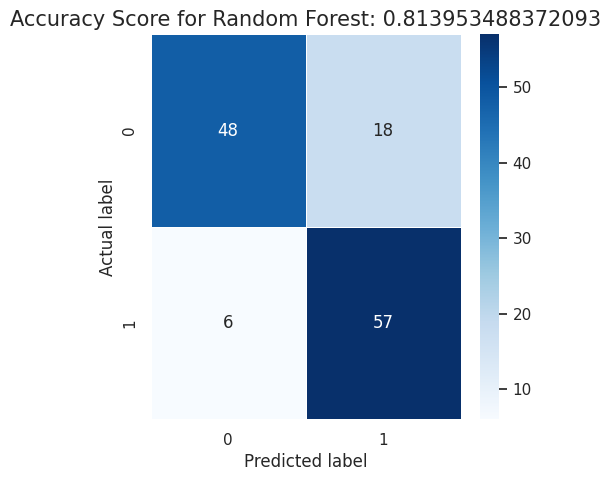

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(best_rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
# Calculate performance metrics
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_precision = precision_score(y_test, y_pred)
rfc_recall = recall_score(y_test, y_pred)
rfc_f1 = f1_score(y_test, y_pred)
rfc_log_loss_value = log_loss(y_test, y_pred_prob)
rfc_auc_score = roc_auc_score(y_test, y_pred_prob)

# Print the performance metrics
print(f"Random Forest Accuracy Score: {rfc_accuracy}")
print(f"Random Forest Precision: {rfc_precision}")
print(f"Random Forest Recall: {rfc_recall}")
print(f"Random Forest F1-Score: {rfc_f1}")
print(f"Random Forest Log-Loss: {rfc_log_loss_value}")
print(f"Random Forest AUC Score: {rfc_auc_score}")

Random Forest Accuracy Score: 81.40 %
Random Forest Precision: 0.76
Random Forest Recall: 0.9047619047619048
Random Forest F1-Score: 0.8260869565217391
Random Forest Log-Loss: 0.48629289594718234
Random Forest AUC Score: 0.8623136123136124


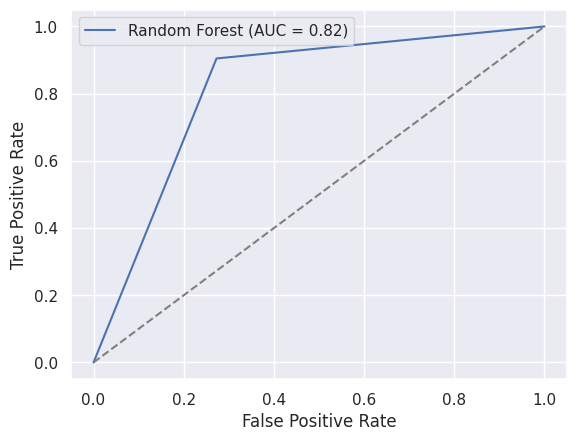

In [ ]:
from sklearn.metrics import roc_curve, auc

# calculate predicted probabilities
y_prob = best_rfc.predict(X_test)

# calculate false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# calculate area under the curve (AUC)
rf_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = best_lr.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
LR_auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %LR_auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Random Forest ROC Curve', size = 15)
plt.legend()

##Metrics Evaluation of the Models

In [ ]:
from tabulate import tabulate

#define the results
results = [
    ['Random Forest', rfc_accuracy, rfc_precision, rfc_recall, rfc_f1, rfc_log_loss_value, rfc_auc_score],
    ['Logistic Regression', LR_accuracy, LR_precision, LR_recall,LR_f1, LR_log_loss, LR_auc]

]

# define the headers
headers = ['Model', 'Accuracy', 'Precision', 'Recall','F1-Score','Log-loss','AUC']

# print the table
print(tabulate(results, headers=headers, tablefmt='grid'))

+---------------------+------------+-------------+----------+------------+------------+----------+
| Model               |   Accuracy |   Precision |   Recall |   F1-Score |   Log-loss |      AUC |
+=====================+============+=============+==========+============+============+==========+
| Random Forest       |   0.813953 |    0.76     | 0.904762 |   0.826087 |   0.486293 | 0.862314 |
+---------------------+------------+-------------+----------+------------+------------+----------+
| Logistic Regression |   0.589147 |    0.569444 | 0.650794 |   0.607407 |   0.638196 | 0.692641 |
+---------------------+------------+-------------+----------+------------+------------+----------+


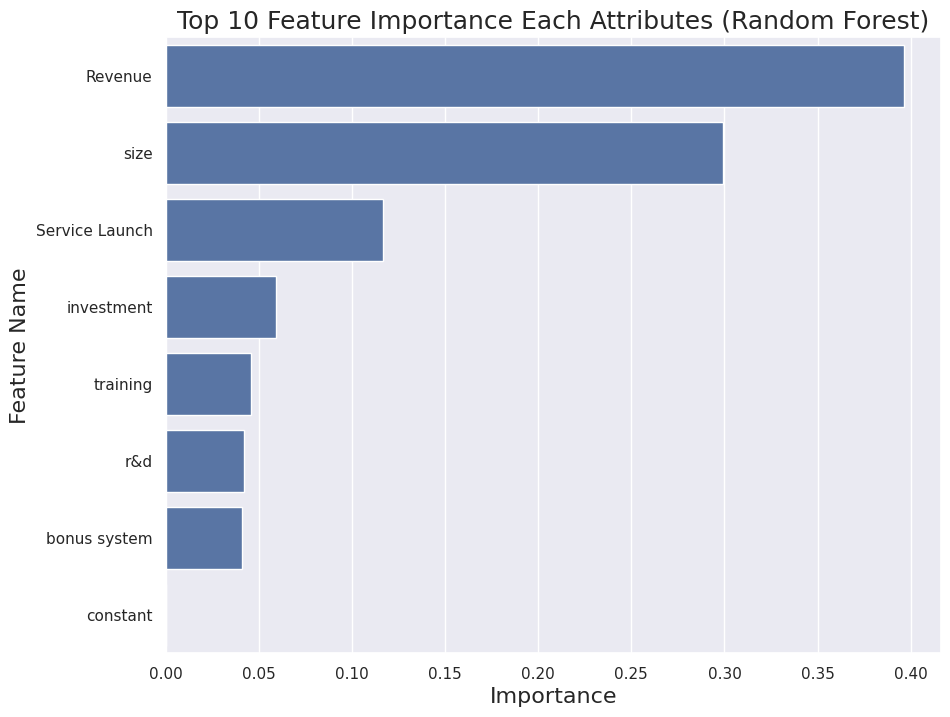

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": best_rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": best_rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=True)
fi

,Feature Name,Importance
7,constant,0.000000
4,bonus system,0.041034
1,r&d,0.041845
3,training,0.045567
2,investment,0.059379
0,Service Launch,0.116694
6,size,0.299159
5,Revenue,0.396322


In [ ]:
df_clean.describe()

,innovativeness,Service Launch,r&d,investment,training,bonus system,Revenue,size,constant
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.0
mean,0.494574,0.482171,0.133333,0.347287,0.299225,0.418605,14.484058,2.468535,1.0
std,0.500359,0.500070,0.340198,0.476477,0.458274,0.493713,2.324254,0.617611,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.615872,0.693147,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.081543,1.945910,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.997833,2.302585,1.0
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,15.761421,3.044522,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,26.340037,3.850148,1.0


**REFERENCES**

Dataset Source: World Bank Enterprise Surveys, http://www.enterprisesurveys.org

Gujarati, D. N. (2022). Basic econometrics. Prentice Hall.

Habshah Midi, S.K. Sarkar & Sohel Rana (2010) Collinearity diagnostics of binary logistic regression model, Journal of Interdisciplinary Mathematics, 13:3, 253-267, DOI: 10.1080/09720502.2010.10700699

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rfc = grid_search.best_estimator_